In [1]:
# wiki_data_00 = "/Users/tom/Desktop/data/wikiextractor/extracted/AA/wiki_00"
wiki_data_01 = "/Users/tom/Desktop/data/wikiextractor/extracted/AA/wiki_01"
save_file_path = "/Users/tom/Desktop/NLP/sc_wiki_data_01.txt"
# save_file_path = "/Users/tom/Desktop/ch_wiki.txt"

In [2]:
import os
import re
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from functools import reduce
from icecream import ic
from collections import Counter
from hanziconv import HanziConv
import jieba
import codecs
import sys


In [3]:
print(HanziConv.toTraditional("我正在学习自然语言处理技术"))

我正在學習自然語言處理技術


In [4]:
print(HanziConv.toSimplified("我正在學習自然語言處理技術"))

我正在学习自然语言处理技术


In [5]:
os.path.exists(wiki_data_01)

True

In [6]:
import logging

def get_stopwords():
    logging.basicConfig(format='%(asctime)s:%(levelname)s:%(message)s',level=logging.INFO)
    #加载停用词表
    stopword_set = set()
    with open("/Users/tom/Desktop/stopwords.txt",'r',encoding="utf-8") as stopwords:
        for stopword in stopwords:
            stopword_set.add(stopword.strip("\n"))
    return stopword_set
 
'''
使用正则表达式解析文本
'''
def parse_zhwiki(read_file_path,save_file_path):
    #过滤掉<doc>
    regex_str = "[^<doc.*>$]|[^</doc>$]"
    file = open(read_file_path,"r",encoding="utf-8")
    #写文件
    output = open(save_file_path,"w+",encoding="utf-8")
    content_line = file.readline()
    #获取停用词表
    stopwords = get_stopwords()
     #定义一个字符串变量，表示一篇文章的分词结果
    article_contents = ""
    while content_line:
        match_obj = re.match(regex_str,content_line)
        content_line = content_line.strip("\n")
        if len(content_line) > 0:
            if match_obj:
                #使用jieba进行分词
                words = jieba.cut(content_line,cut_all=False)
                for word in words:
                    if word not in stopwords:
                        article_contents += word+" "
            else:
                if len(article_contents) > 0:
                    output.write(article_contents+"\n")
                    article_contents = ""
        content_line = file.readline()
    output.close()
 
'''
将维基百科语料库进行分类
'''
def generate_corpus():
    zhwiki_path = "/Users/tom/Desktop/NLP"
    save_path = "/Users/tom/Desktop/NLP"
    for i in range(3):
        file_path = os.path.join(zhwiki_path,str("zh_wiki_0%s_jt"%str(i)))
        parse_zhwiki(file_path,os.path.join(save_path,"wiki_corpus0%s"%str(i)))


文本处理

In [7]:
# parse_zhwiki(wiki_data_01,save_file_path)

In [8]:
def process_text(path):
    with open(path,'r',encoding="utf-8") as f:
        content =  f.read()
        return content
    

In [9]:
text =  process_text(save_file_path)

In [10]:
def cut(string): return list(jieba.cut(string))

In [12]:
TEXT = cut(text)

In [13]:
len(TEXT)

95080019

In [14]:
def get_words(text):
    valid_words = []
    for w in text:
        if  not re.match('[+——() ? 【】“”！，：。？、~@#￥%……&*（ ）《 》,「 」“ ” \n]+',w):
#           if re.match(['[\w|\d'+],w)
            valid_words.append(w)
    return valid_words
            

In [15]:
TOKENS =  get_words(TEXT)

In [16]:
TOKENS[:1000]

['病毒',
 '概论',
 '病毒',
 '是',
 '一种',
 '依靠',
 '宿主',
 '的',
 '细胞',
 '来',
 '繁殖',
 '的',
 '类',
 '生物',
 '体',
 '在',
 '感染',
 '宿主',
 '细胞',
 '之',
 '后',
 '病毒',
 '就',
 '会',
 '迫使',
 '宿主',
 '细胞',
 '以',
 '很快',
 '的',
 '速度',
 '制',
 '造',
 '装配',
 '出数',
 '千份',
 '与',
 '它',
 '病毒',
 '相同',
 '的',
 '拷贝',
 '不像',
 '大多',
 '数',
 '生物',
 '体',
 '病毒',
 '没有',
 '会',
 '分裂',
 '的',
 '细胞',
 '新',
 '的',
 '病毒',
 '是',
 '在',
 '宿主',
 '细胞',
 '内',
 '生产',
 '组装',
 '的',
 '不过',
 '与',
 '构造',
 '更',
 '简单',
 '的',
 '传染',
 '性病',
 '原体',
 '朊病毒',
 '不同',
 '病毒',
 '含有',
 '能',
 '使得',
 '它们',
 '发生',
 '变异',
 '和',
 '进化',
 '的',
 '核酸',
 '目前',
 '人们',
 '已经',
 '发现',
 '了',
 '超过',
 '5000',
 '种',
 '的',
 '病毒',
 '病毒',
 '的',
 '起源',
 '至今',
 '不明',
 '有些',
 '病毒',
 '可能',
 '是',
 '由',
 '质粒',
 '即',
 '一种',
 '可',
 '在',
 '细胞',
 '间',
 '移动',
 '的',
 '环状',
 'DNA',
 '进化',
 '而',
 '来',
 '同时',
 '也',
 '有些',
 '病毒',
 '可能',
 '是',
 '由',
 '细菌',
 '进化',
 '而',
 '来',
 '病毒',
 '由',
 '两',
 '或',
 '三种',
 '结构',
 '组成',
 '其中',
 '所有',
 '病毒',
 '都',
 '有',
 '的',
 '两种',
 '结构',
 '是',
 '化学',
 '本质',
 '爲',
 'DNA'

In [198]:
# Valid_Token = re.sub('[+——() ? 【】“”！，：。？、~@#￥%……&*（）《 》]+','',TEXT)

In [17]:
valid_TOKEN= [w for w in TOKENS if w.strip()and w!='n']

In [18]:
len(TOKENS)

40014422

In [19]:
len(valid_TOKEN)

39997273

In [20]:
valid_TOKEN[:100]

['病毒',
 '概论',
 '病毒',
 '是',
 '一种',
 '依靠',
 '宿主',
 '的',
 '细胞',
 '来',
 '繁殖',
 '的',
 '类',
 '生物',
 '体',
 '在',
 '感染',
 '宿主',
 '细胞',
 '之',
 '后',
 '病毒',
 '就',
 '会',
 '迫使',
 '宿主',
 '细胞',
 '以',
 '很快',
 '的',
 '速度',
 '制',
 '造',
 '装配',
 '出数',
 '千份',
 '与',
 '它',
 '病毒',
 '相同',
 '的',
 '拷贝',
 '不像',
 '大多',
 '数',
 '生物',
 '体',
 '病毒',
 '没有',
 '会',
 '分裂',
 '的',
 '细胞',
 '新',
 '的',
 '病毒',
 '是',
 '在',
 '宿主',
 '细胞',
 '内',
 '生产',
 '组装',
 '的',
 '不过',
 '与',
 '构造',
 '更',
 '简单',
 '的',
 '传染',
 '性病',
 '原体',
 '朊病毒',
 '不同',
 '病毒',
 '含有',
 '能',
 '使得',
 '它们',
 '发生',
 '变异',
 '和',
 '进化',
 '的',
 '核酸',
 '目前',
 '人们',
 '已经',
 '发现',
 '了',
 '超过',
 '5000',
 '种',
 '的',
 '病毒',
 '病毒',
 '的',
 '起源',
 '至今']

In [21]:
word_count = Counter(valid_TOKEN)

In [22]:
word_count.most_common(100)

[('的', 1773993),
 ('年', 651903),
 ('在', 536014),
 ('是', 420784),
 ('于', 352835),
 ('为', 308899),
 ('月', 299437),
 ('和', 295162),
 ('了', 244272),
 ('与', 181049),
 ('·', 180477),
 ('日', 175977),
 ('后', 162105),
 ('人', 155666),
 ('有', 152914),
 ('他', 147357),
 ('中', 145600),
 ('被', 138457),
 ('-', 127835),
 ('并', 119791),
 ('由', 118819),
 ('也', 112690),
 ('而', 104318),
 ('一个', 94336),
 ('上', 90781),
 ('以', 90606),
 ('；', 88093),
 ('1', 84454),
 ('该', 83763),
 ('将', 78495),
 ('对', 78062),
 ('等', 77583),
 ('时', 71903),
 ('其', 71324),
 ('美国', 71093),
 ('到', 71021),
 ('位', 70772),
 ('及', 68670),
 ('但', 68429),
 ('2', 67912),
 ('会', 64436),
 ('3', 64201),
 ('"', 64174),
 ('至', 62804),
 ('平方公里', 59515),
 ('中国', 54737),
 ('人口', 54581),
 ('来', 54365),
 ('4', 54340),
 ('米', 53807),
 ('都', 53338),
 ('10', 53100),
 ('不', 52288),
 ('5', 51199),
 ('之', 50316),
 ('台', 48856),
 ('区', 48108),
 ('从', 48100),
 ('她', 47302),
 ('或', 47038),
 ('8', 46863),
 ('6', 46688),
 ('7', 46111),
 ('面积', 45347),
 ('12',

In [81]:
# valid_word_count = Counter(valid_TEXT)

In [23]:
frequences = [f for w,f in word_count.most_common()]

In [24]:
X = [i for i  in range (len(frequences[0:]))]

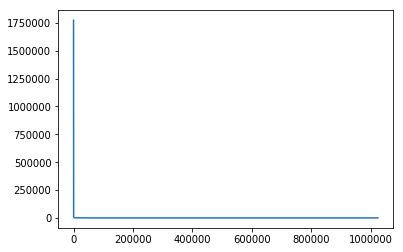

In [25]:
plt.plot(X,frequences)

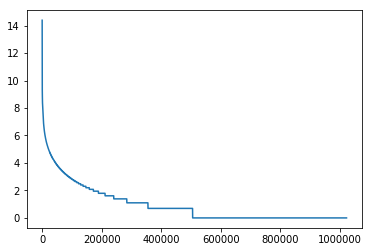

In [26]:
plt.plot(X,np.log(frequences))

In [27]:
frequences_sum = sum(frequences)

In [28]:
1/frequences_sum

2.5001704491203687e-08

In [29]:
def get_grep(word):
    esp = 1/frequences_sum
    if word in word_count:
        return word_count[word]/frequences_sum
    else:
        return esp
        

In [30]:
get_grep("我们")

0.0002101643279530582

In [31]:
get_grep("哈哈")

1.2500852245601845e-06

In [32]:
def product(numbers):
    return reduce(lambda n1,n2:n1*n2,numbers)

In [33]:
product([1,2,4,5])

40

In [34]:
def language_model_one_gram(string):
    words = cut(string)
    return product([get_grep(word) for word in words])

In [35]:
language_model_one_gram("杭州下个月举办会议")

2.193511207916893e-19

In [36]:
cut("杭州下个月举办会议")

['杭州', '下个月', '举办', '会议']

In [37]:
language_model_one_gram("广交会下个月举办")

5.395478434996817e-19

In [38]:
language_model_one_gram("我是谁")

1.5531341984163094e-10

In [39]:
language_model_one_gram("谁是我")

1.553134198416309e-10

In [44]:
sentences= """
波音飞机从天上掉下来了
奔驰汽车出现了故障
女生坐在引擎盖上哭泣
女生喜欢坐在宝马里哭
""".split()

In [45]:
for s in sentences:
    print(s, language_model_one_gram(s))

波音飞机从天上掉下来了 5.382871769293054e-26
奔驰汽车出现了故障 2.1303309035476502e-20
女生坐在引擎盖上哭泣 1.0085445053363242e-24
女生喜欢坐在宝马里哭 2.2835222843260025e-28


In [50]:
wait_compared = ["今天买了一台电脑 今天一台电脑买了我",
                "你是我的人生作答的收货 你是我人生最大的收获",
                "我是谁 谁是我",
                "女生坐在宝马里哭 女生坐在奔驰引擎盖上哭"]
for s in wait_compared:
    s1,s2 = s.split()
    p1,p2 = language_model_one_gram(s1),language_model_one_gram(s2)
    better = s1 if p1 >p2 else s2
    print('{} most possible'.format(better))

今天买了一台电脑 most possible
你是我人生最大的收获 most possible
我是谁 most possible
女生坐在宝马里哭 most possible


In [55]:
valid_TOKENS= [str(t) for t in valid_TOKEN]

In [56]:
all_2_gram = [''.join(valid_TOKENS[i:i+2]) for i in range(len(valid_TOKENS[:-2]))]

In [58]:
all_2_gram[:20]

['病毒概论',
 '概论病毒',
 '病毒是',
 '是一种',
 '一种依靠',
 '依靠宿主',
 '宿主的',
 '的细胞',
 '细胞来',
 '来繁殖',
 '繁殖的',
 '的类',
 '类生物',
 '生物体',
 '体在',
 '在感染',
 '感染宿主',
 '宿主细胞',
 '细胞之',
 '之后']

In [59]:
_2_gram_count = Counter(all_2_gram)

In [61]:
_2_gram_count.most_common(30)

[('位于', 62165),
 ('2016年', 37617),
 ('的一个', 32989),
 ('2017年', 32345),
 ('于该国', 31012),
 ('年人口', 29782),
 ('2018年', 29099),
 ('管辖', 26895),
 ('负责管', 26818),
 ('10月', 26796),
 ('9月', 26115),
 ('2015年', 26039),
 ('每平方公里', 25500),
 ('8月', 25469),
 ('12月', 25393),
 ('他的', 25345),
 ('7月', 25101),
 ('2001年', 24984),
 ('人口密度每', 24408),
 ('1月', 23869),
 ('11月', 23530),
 ('乌克兰的', 23400),
 ('3月', 23381),
 ('6月', 23096),
 ('5月', 22626),
 ('4月', 22251),
 ('年1', 21505),
 ('中的', 21380),
 ('平方公里海拔高度', 21058),
 ('年12', 19691)]

In [65]:
_2_frequences = [f for w,f in _2_gram_count.most_common()]

In [66]:
_all_2_gram_sum = sum(_2_frequences)

In [67]:
_all_2_gram_sum

39997271

In [69]:
def get_combination_words(w1,w2):
    if w1+w2 in _2_gram_count: return _2_gram_count[w1+w2]/_all_2_gram_sum
    else:
        return 1/_all_2_gram_sum

In [70]:
get_combination_words('去','日本')

5.250358205688583e-07

In [71]:
get_combination_words('去','美国')

9.250631124308456e-07

In [72]:
def get_prob_2_gram(w1,w2):
    return get_combination_words(w1,w2)/get_grep(w1)

In [73]:
get_prob_2_gram('去','美国')

0.0031888306343295894

In [75]:
get_prob_2_gram('去','厦门')

8.618461173863756e-05

In [78]:
def language_model_of_2_gram(string):
    str_prob = 1
    words = cut(string)
    for i,word in enumerate(words):
        if i == 0:
            prob = get_grep(word)
        else:
            pre_word = words[i-1]
            prob = get_prob_2_gram(pre_word,word)
        str_prob *= prob
    return str_prob

In [79]:
language_model_of_2_gram('今年溜溜的好')

7.680938420689884e-12

In [83]:
need_compared = [
    "今天晚上请你吃大餐我们一起吃日料 明天晚上请你吃大餐我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯",
    "我们依赖的来的这里  我们一起来的这里",
    "这个世界不是我们想的那样 这是个时节不是我们想的那样"
]
for s in need_compared:
    s1,s2 = s.split()
    p1,p2 = language_model_of_2_gram(s1),language_model_of_2_gram(s2)
    better = s1 if p1>p2 else s2
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐我们一起吃日料 is more possible
---- 今天晚上请你吃大餐我们一起吃日料 with probility 3.0890783348254365e-29
---- 明天晚上请你吃大餐我们一起吃苹果 with probility 1.029692778275146e-29
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 7.342137696266622e-21
---- 真是一只好看的小猫 with probility 8.603516522280051e-17
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 3.9791870610934096e-14
---- 今晚火锅去吃我 with probility 1.3936712906687034e-15
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 3.0659073842503366e-14
---- 养乐多绿来一杯 with probility 2.500170699154479e-08
我们一起来的这里 is more possible
---- 我们依赖的来的这里 with probility 1.0589374848446442e-19
---- 我们一起来的这里 with probility 5.85637143712703e-16
这个世界不是我们想的那样 is more possible
---- 这个世界不是我们想的那样 with probility 1.8442690296768668e-20
---- 这是个时节不是我们想的那样 with probility 1.169108214719725e-24
